# Corroboracion de validez de metodo de la potencia

In [1]:
import metnum
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import ortho_group
import time

In [16]:
def validatePowerValues(dim,iterations,num_iter=6000,eps=1e-16):
    res=True
    times=[]
    for i in range(iterations):
        S = ortho_group.rvs(dim)
        vector=np.sort(np.diag(np.random.rand(dim,dim)))[::-1]
        D= np.diag(vector)
        m=S@D@S.T
        start_time = time.time()
        U=metnum.get_first_eigenvalues(m,dim,num_iter,eps)
        times.append(time.time() - start_time)
        res=np.allclose(vector,U[0])
        M=U[1]
        for q in range(dim):
            sign=1 if np.allclose(S[:,q],M[:,q]) else -1
            res=res and np.allclose(S[:,q],sign*M[:,q])
    return [res,np.array(times).mean()]

# Tiempos y correctitud del resultado variando epsilon

In [19]:
eps=[1e-20,1e-18,1e-16,1e-14,1e-12,1e-10,1e-8,1e-6,1e-4,1e-2]
times=[]
didWorked=[]
for ep in eps:
    res=validatePowerValues(9,40,eps=ep)
    times.append(res[1])
    didWorked.append(res[0])
    print(ep,':',res)

1e-20 : [True, 0.0024258434772491456]
1e-18 : [True, 0.0019025325775146485]
1e-16 : [True, 0.0008010566234588623]
1e-14 : [False, 0.00037271380424499514]
1e-12 : [True, 0.00030502080917358396]
1e-10 : [True, 0.00021647810935974122]
1e-08 : [False, 0.0001974344253540039]
1e-06 : [False, 0.00016794800758361815]
0.0001 : [False, 7.231831550598144e-05]
0.01 : [False, 2.5933980941772462e-05]


# Se ve que un epsilon mas grande que 1e-10 falla la revision del np.allclose, asi que vamos a ver los tiempos para los epsilons que no fallan

[1e-20, 1e-18, 1e-16, 1e-14, 1e-12, 1e-10]
[0.0024258434772491456, 0.0019025325775146485, 0.0008010566234588623, 0.00037271380424499514, 0.00030502080917358396, 0.00021647810935974122]
0.00021647810935974122


[Text(0, 0.5, 'time (s)'), Text(0.5, 0, 'epsilon')]

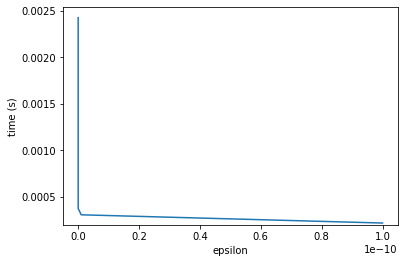

In [20]:
fig, ax = plt.subplots()
print(eps[:6])
print(times[:6])
print(times[5])
ax.plot(eps[:6], times[:6])
ax.set_ylim(bottom=times[6])
ax.set(xlabel='epsilon', ylabel='time (s)')

# Realizamos pruebas para diferentes iteraciones con un epsilon fijo

In [23]:
num_iters=[1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]
times=[]
didWorked=[]
for num_iter_value in num_iters:
    res=validatePowerValues(20,20,num_iter=num_iter_value)
    times.append(res[1])
    didWorked.append(res[0])
    print(num_iter_value,':',res)

1000 : [False, 0.002093076705932617]
2000 : [False, 0.0024760842323303224]
3000 : [True, 0.003014016151428223]
4000 : [False, 0.002850985527038574]
5000 : [False, 0.0037903428077697755]
6000 : [False, 0.0034978628158569337]
7000 : [False, 0.0033426880836486816]
8000 : [True, 0.004103624820709228]
9000 : [False, 0.0042522668838500975]
10000 : [True, 0.004368424415588379]


[7000, 8000, 9000, 10000]
[0.0033426880836486816, 0.004103624820709228, 0.0042522668838500975, 0.004368424415588379]
0.0033426880836486816


[Text(0, 0.5, 'time (s)'), Text(0.5, 0, 'Numero de iteraciones')]

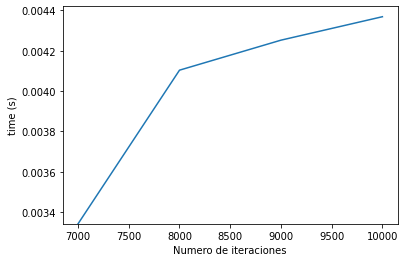

In [24]:
fig, ax = plt.subplots()
print(num_iters[6:])
print(times[6:])
print(times[6])
ax.plot(num_iters[6:], times[6:])
ax.set_ylim(bottom=times[6])
ax.set(xlabel='Numero de iteraciones', ylabel='time (s)')